<a href="https://colab.research.google.com/github/JoseDA0721/Ejercicio-Ebow/blob/main/Taller_Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejercicio a Resolver: Análisis y Clustering de Datos del "New York City Airbnb Open Data"

**Objetivo:**
Realizar un análisis exhaustivo y clustering del dataset "New York City Airbnb Open Data" utilizando el Método del Codo basado en SSE/WCSS para determinar el número óptimo de clusters y realizar una interpretación avanzada de los resultados.

url = 'https://raw.githubusercontent.com/erkansirin78/datasets/master/AB_NYC_2019.csv'

En el desarrollo de este taller, el algoritmo K-means se utiliza para agrupar alojamientos de Airbnb en la ciudad de Nueva York en diferentes clusters basados en características específicas. El objetivo principal es identificar patrones y grupos de propiedades que tienen características similares.

El dataset "New York City Airbnb Open Data" proporciona información detallada sobre los listados de Airbnb en la ciudad de Nueva York. Este dataset incluye diversos atributos que describen los alojamientos, como precios, ubicaciones, número de reseñas, disponibilidad, y más. Es útil para análisis exploratorios, clustering, y otras tareas de ciencia de datos y aprendizaje automático.

**¿Qué se Intenta Agrupar?**

Se intenta agrupar los alojamientos de Airbnb en clusters según sus características cuantitativas.

**Propósito de Agrupar con K-means**
 * Descubrir patrones y características comunes entre diferentes grupos de alojamientos.
 * Identificar alojamientos con precios similares, disponibilidad y otros factores.
 * Segmentar el mercado de alojamientos en diferentes categorías (por ejemplo, alojamientos de lujo, económicos, con alta disponibilidad, etc.).
 * Ayudar a los anfitriones y potenciales clientes a comprender mejor las diferentes opciones disponibles.
 * Analizar la distribución geográfica de los clusters para entender cómo las características de los alojamientos varían según la ubicación.
 * Visualizar cómo los alojamientos con diferentes características están distribuidos por la ciudad.

**Características presentes en el dataset:**
 * id: Identificador único para cada listado.
 * name: Nombre del listado de Airbnb.
 * host_id: Identificador único del anfitrión.
 * host_name: Nombre del anfitrión.
 * neighbourhood_group: El grupo de vecindarios en Nueva York (e.g., Manhattan, Brooklyn).
 * neighbourhood: Vecindario específico donde se encuentra el listado.
 * latitude: Latitud de la ubicación del listado.
 * longitude: Longitud de la ubicación del listado.
 * room_type: Tipo de habitación ofrecida (e.g., Entire home/apt, Private room, Shared room).
 * price: Precio por noche en dólares.
 * minimum_nights: Número mínimo de noches requeridas para reservar.
 * number_of_reviews: Número de reseñas recibidas.
 * last_review: Fecha de la última reseña.
 * reviews_per_month: Número promedio de reseñas por mes.
 * calculated_host_listings_count: Número de listados calculados que tiene el anfitrión.
 * availability_365: Número de días disponibles en el año.

Pasos a Seguir:
 * Cargar el Dataset.
 * Cargar los datos en un DataFrame de Pandas.
 * Realizar un análisis exploratorio de los datos (EDA).
 * Verificar valores nulos, tipos de datos y estadísticas descriptivas.
 * Seleccionar características relevantes para el clustering (6 características).
 * Lidiar con los valores nulos (rellenar o eliminar).
 * Escalar las características usando el método de su preferencia (Debe presentar las comparaciones entre los métodos presentados).
 * Implementar el algoritmo K-means para un rango de valores de k.
 * Calcular la SSE/WCSS para cada valor de k.
 * Graficar la SSE/WCSS en función del número de clusters.
 * Identificar el número óptimo de clusters visualmente.
 * Utilizar el número óptimo de clusters identificado.
 * Ajustar el modelo K-means a los datos escalados.
 * Asignar cada punto de datos a un cluster.
 * Añadir la etiqueta del cluster al DataFrame original.
 * Calcular estadísticas descriptivas para cada cluster.
 * Visualizar los clusters utilizando gráficos de dispersión.
 * Realizar un análisis geográfico de los clusters, graficando las ubicaciones de los alojamientos en un mapa.
 * Visualizar noches (escalado) vs precio (escalado).
 * Etiquetar los clusters en función de las reseñas.
 * Añadir los resultados a un mapa.

# Librerias

In [ ]:
!pip install yellowbrick

In [ ]:
!pip install missingno

In [ ]:
!pip install pyclustertend==1.3

In [ ]:
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_blobs
from scipy.signal import find_peaks
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

# Analisis de Datos

In [ ]:
url = 'https://raw.githubusercontent.com/erkansirin78/datasets/master/AB_NYC_2019.csv'
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df = df.drop(['id', 'name', 'host_id', 'host_name'], axis=1)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


<Axes: >

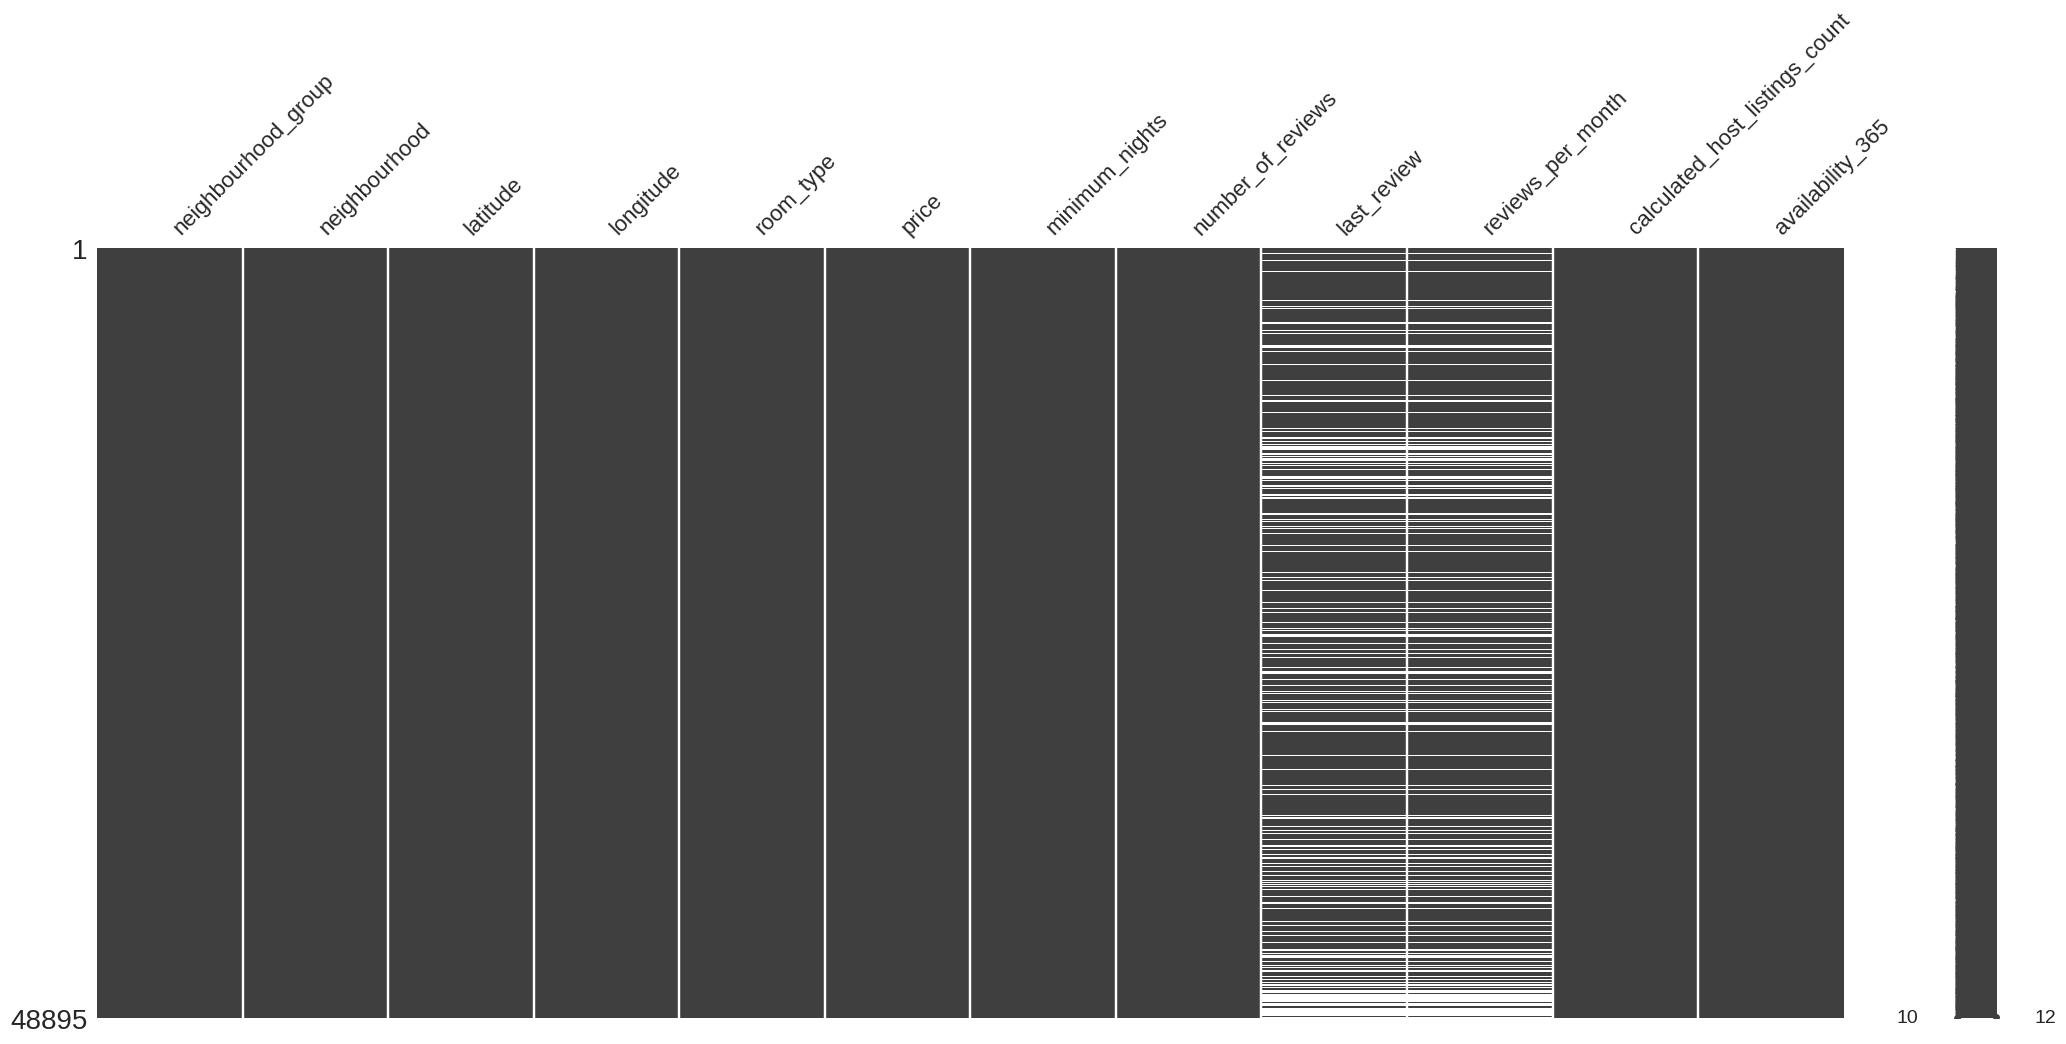

In [ ]:
msno.matrix(df)

<Axes: >

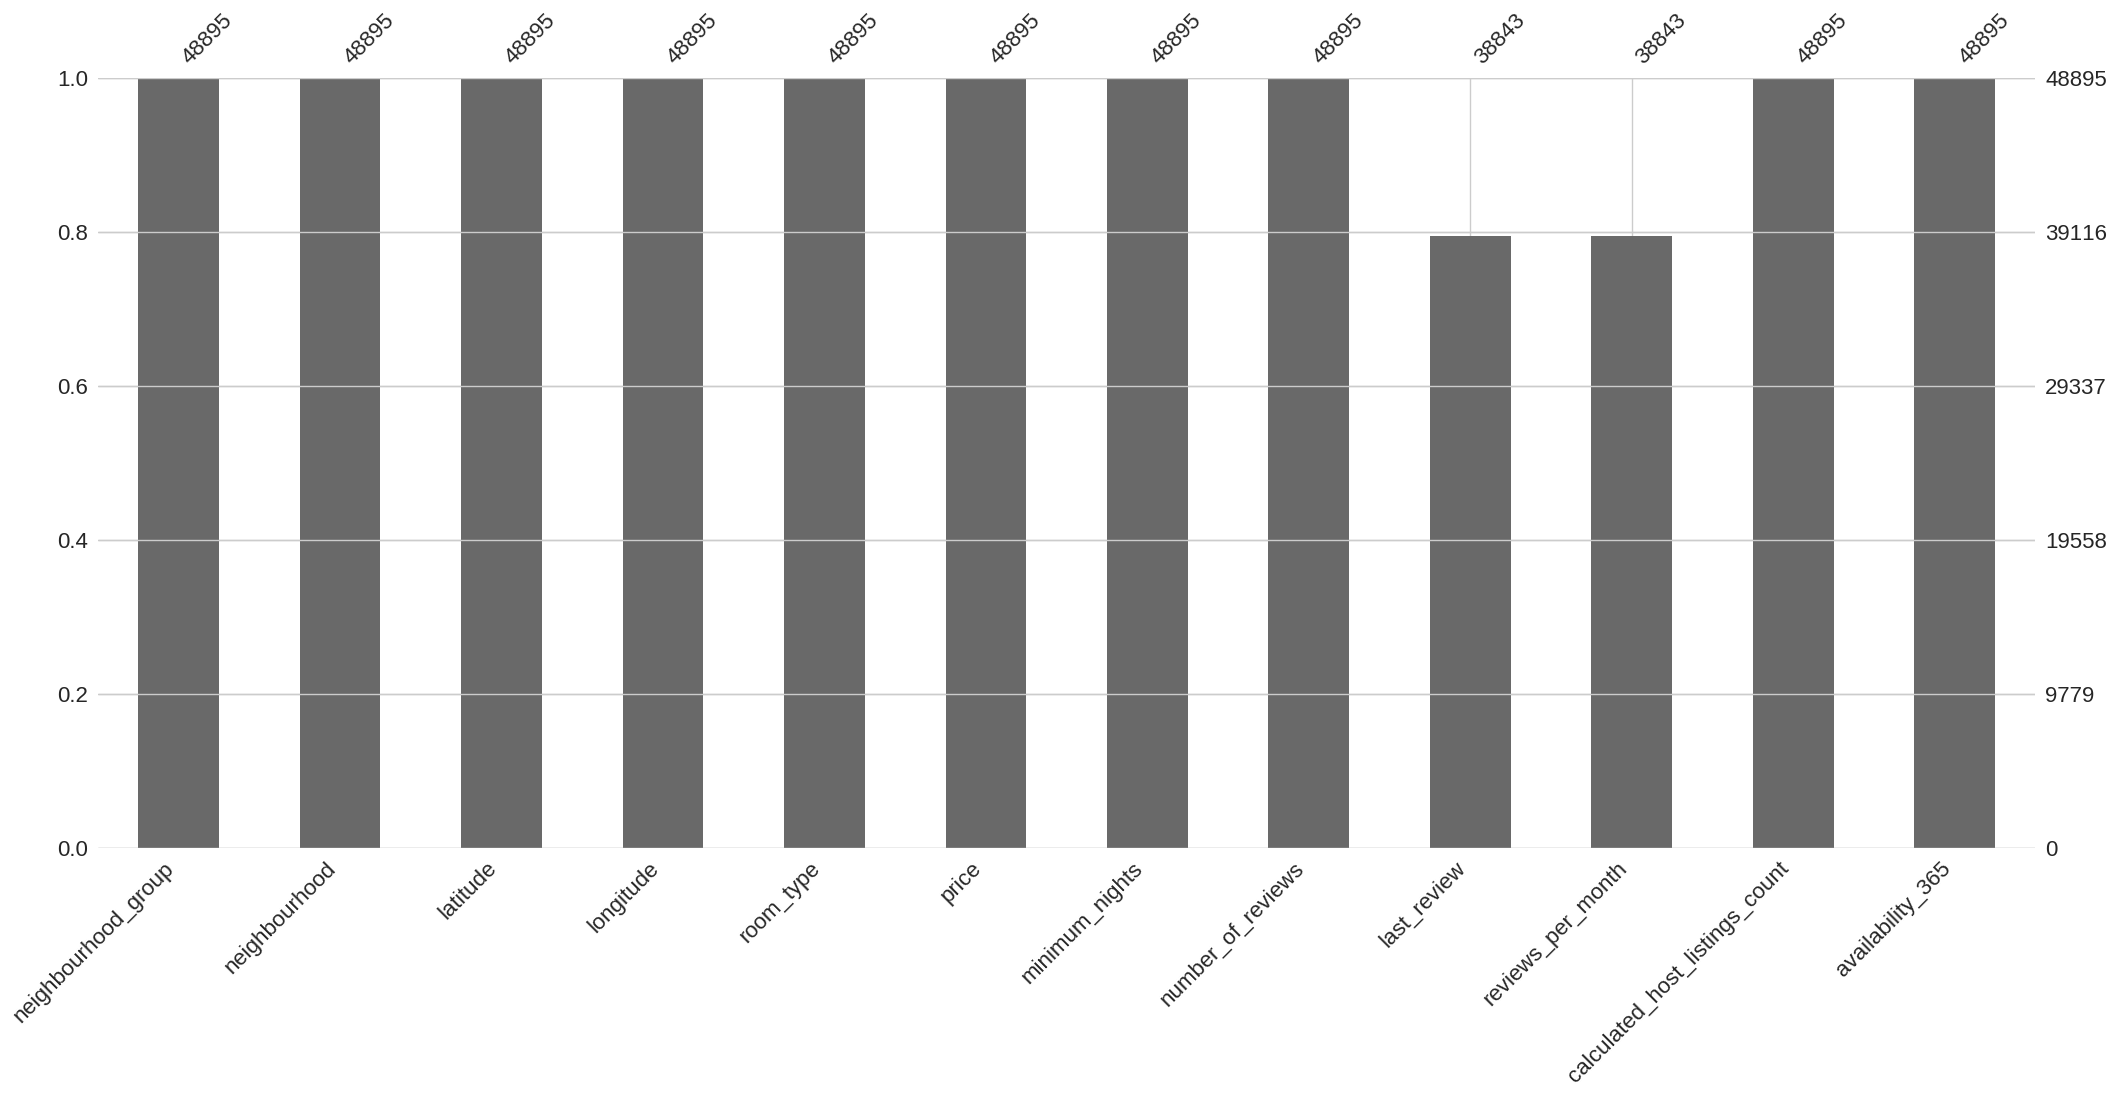

In [ ]:
msno.bar(df)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['reviews_per_month'] = imputer.fit_transform(df['reviews_per_month'].values.reshape(-1, 1))

# Handle 'last_review' separately since it's a datetime column
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Impute missing dates with a common strategy like filling with the most frequent date
most_frequent_date = df['last_review'].mode()[0]
df['last_review'].fillna(most_frequent_date, inplace=True)

<Axes: >

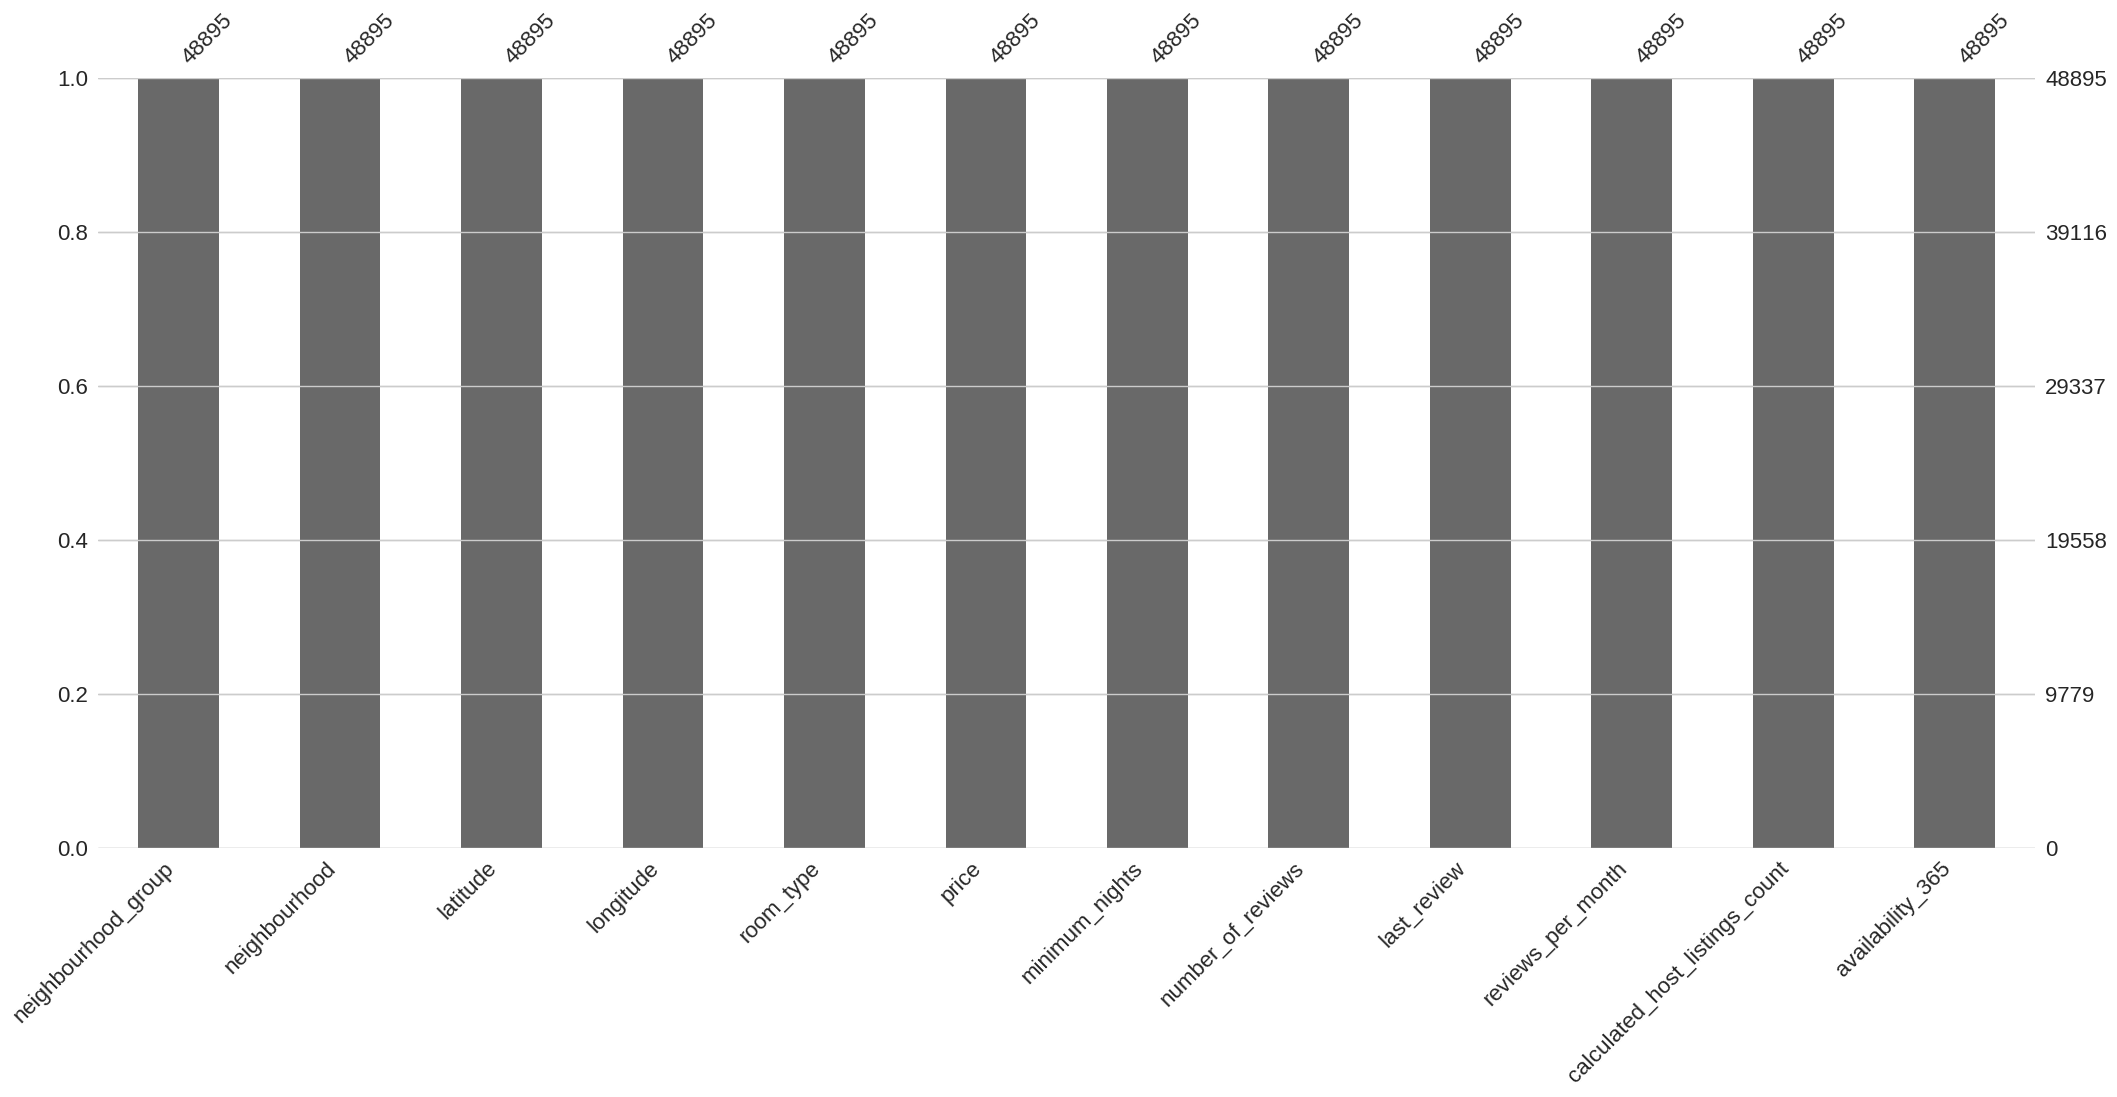

In [ ]:
msno.bar(df)

In [ ]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.02,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


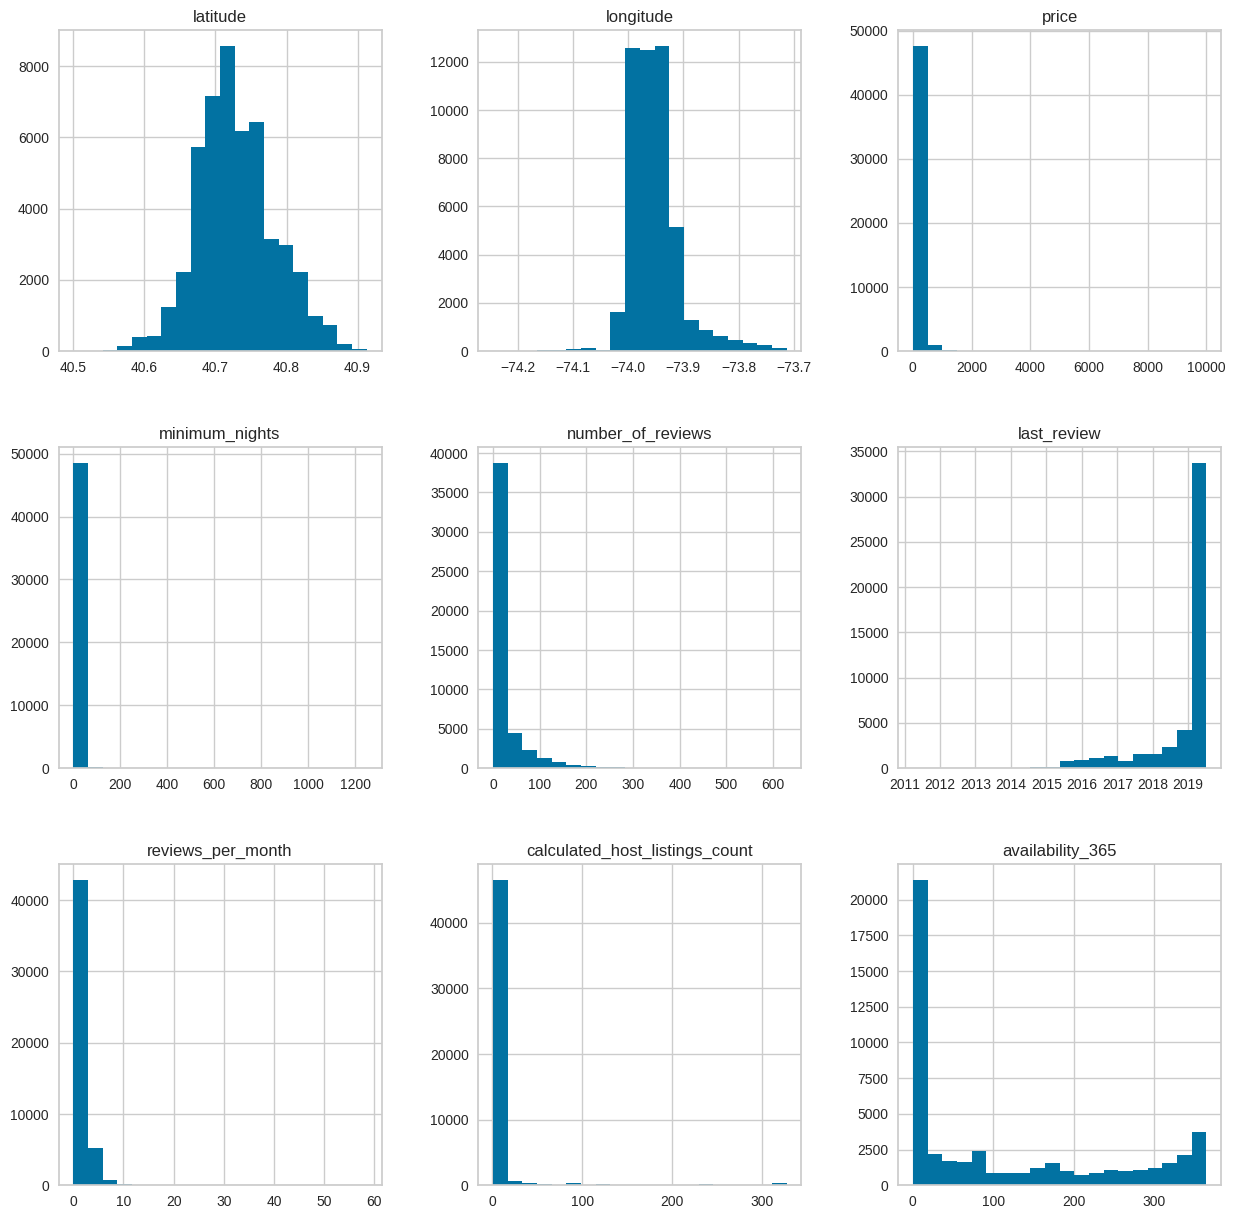

In [ ]:
df.hist(figsize=(15, 15), bins=20)
plt.show()

In [ ]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  int64         
 1   neighbourhood                   48895 non-null  int64         
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  int64         
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     48895 non-null  datetime64[ns]
 9   reviews_per_month               48895 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  av

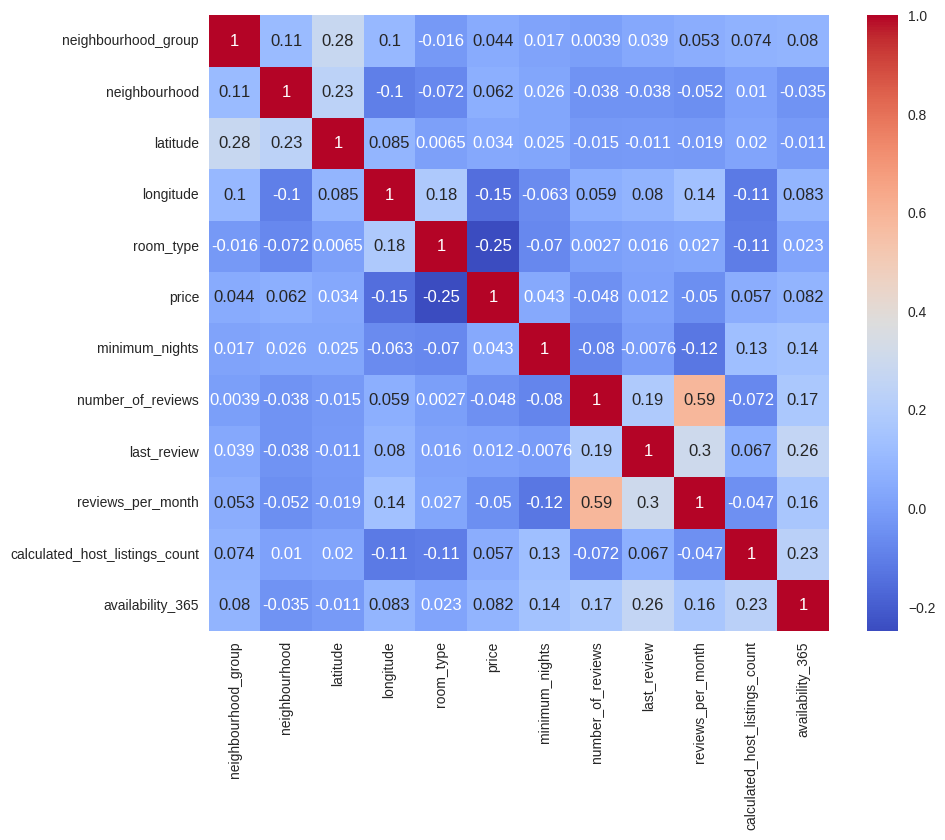

In [ ]:
df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 12})
plt.show()

In [ ]:
#caracteristicas = ['latitude', 'longitude', 'room_type', 'price', 'reviews_per_month', 'availability_365']
caracteristicas = ['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'reviews_per_month', 'availability_365']
X_scaled = df[caracteristicas]
X.head()

,neighbourhood_group,neighbourhood,room_type,price,reviews_per_month,availability_365
0,1,108,1,149,0.21,365
1,2,127,0,225,0.38,355
2,2,94,1,150,0.02,365
3,1,41,0,89,4.64,194
4,2,61,0,80,0.10,0


In [ ]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

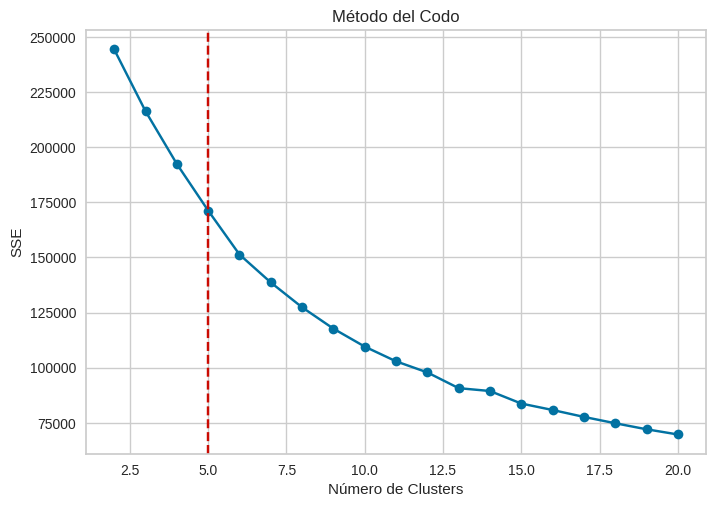

In [ ]:
warnings.filterwarnings('ignore')
sse = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(2, 21), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.axvline(x = 5, linestyle = '--', color = 'r', label = 'Número óptimo de clusters')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

In [ ]:
df.groupby('cluster').mean().transpose()

cluster,0,1,2,3,4
neighbourhood_group,1.567684,1.56344,1.824706,1.839127,1.661523
neighbourhood,198.200995,63.034177,98.441446,109.490865,68.031417
latitude,40.73403,40.726085,40.729782,40.730724,40.724914
longitude,-73.958026,-73.944652,-73.939718,-73.950582,-73.962336
room_type,0.430211,1.078876,0.516153,0.460789,0.001201
price,147.641634,78.850944,127.048642,211.359599,191.209665
minimum_nights,6.186645,5.148013,2.215308,12.892626,6.486047
number_of_reviews,13.526834,13.286199,82.148128,23.150754,13.786731
last_review,2018-09-02 16:01:00.614177536,2018-10-08 19:34:23.448995584,2019-06-22 17:31:27.224669696,2019-03-08 12:24:04.992036096,2018-09-17 15:18:47.702827520
reviews_per_month,0.568012,0.622738,4.611909,0.824474,0.602245


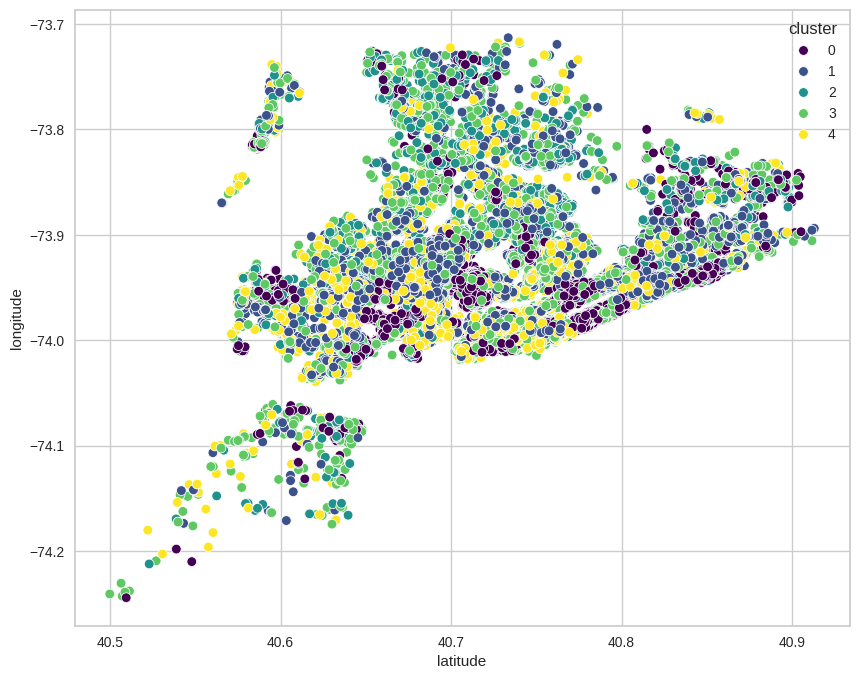

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='latitude', y='longitude', hue='cluster', data=df, palette='viridis')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  int64         
 1   neighbourhood                   48895 non-null  int64         
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  int64         
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     48895 non-null  datetime64[ns]
 9   reviews_per_month               48895 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  av

In [109]:
caracteristicas = ['minimum_nights', 'price']
X = df[caracteristicas]
X.head()

,minimum_nights,price
0,1,149
1,1,225
2,3,150
3,1,89
4,10,80


In [110]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X = pd.DataFrame(X, columns=caracteristicas)
X['cluster'] = df['cluster']
X.head()

,minimum_nights,price,cluster
0,-0.293996,-0.015493,3
1,-0.293996,0.300974,3
2,-0.196484,-0.011329,3
3,-0.293996,-0.265335,2
4,0.144807,-0.302811,4


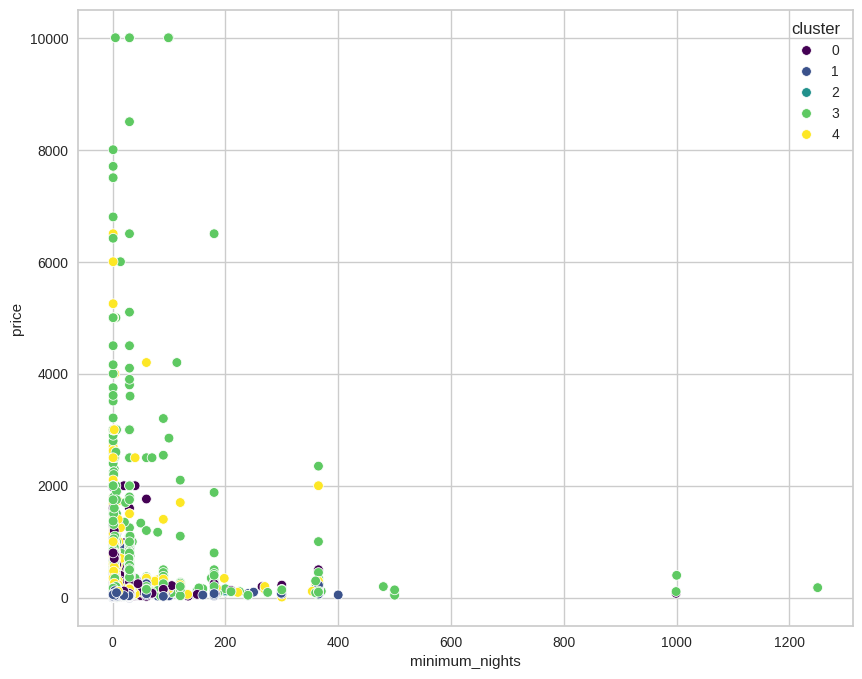

In [112]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='minimum_nights', y='price',hue='cluster', data=df, palette='viridis')
plt.show()

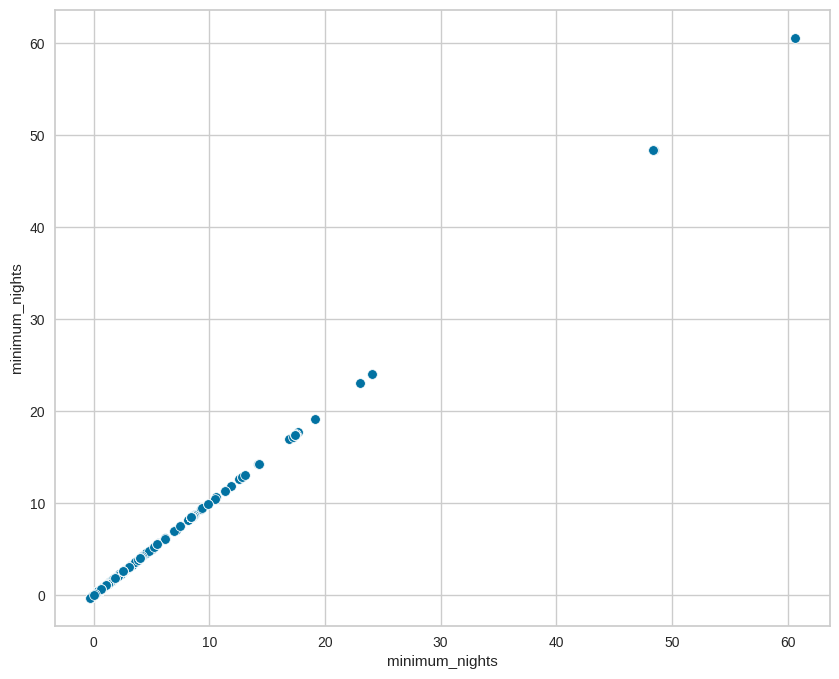

In [115]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='minimum_nights', y='minimum_nights', data=X, palette='viridis')
plt.show()